# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [110]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [109]:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [125]:
#Begin printing log
print("Beginning Data Retrieval:")
print("-------------------------")

#Create empty list to hold city data and counters for looping
city_list = []
loop_counter = 0
set_counter= 1
record_counter = 1

#Loop through the list of cities and print out in sets of 50
for city in cities:
    if (loop_counter % 50 == 0 and loop_counter >=50):
        record_counter = 1
        set_counter += 1
    
    loop_counter += 1
    
    print(f"Processing Record {record_counter} of Set {set_counter} | {city}")
    record_counter += 1
    
    #API request for each city and store into data list
    url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}&q={city}"
    
    #Use a try to retrieve information about each city and an except to skip any cities with missing information
    try:
        weather = requests.get(url).json()
        date = weather["dt"]
        latitude = weather["coord"]["lat"]
        longitude = weather["coord"]["lon"]
        humidity = weather["main"]["humidity"]
        max_temp = weather["main"]["temp_max"]
        clouds = weather["clouds"]["all"]
        wind_speed = weather["wind"]["speed"]
        country = weather["sys"]["country"]
        
        city_list.append({
           
            "City": city,
            "Lat": latitude,
            "Lng": longitude,
            "Max Temp": max_temp,
            "Humidity": humidity,
            "Cloudiness": clouds,
            "Wind Speed": wind_speed,
            "Country": country,
             "Date": date
        })
        
    except:
        print("City not found. Skipping.")
        pass
    
    
print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")

Beginning Data Retrieval:
-------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | butaritari
Processing Record 3 of Set 1 | klaksvik
Processing Record 4 of Set 1 | marcona
City not found. Skipping.
Processing Record 5 of Set 1 | lebu
Processing Record 6 of Set 1 | lake elsinore
Processing Record 7 of Set 1 | hithadhoo
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | nikolskoye
Processing Record 10 of Set 1 | altay
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | sentyabrskiy
City not found. Skipping.
Processing Record 13 of Set 1 | tombouctou
Processing Record 14 of Set 1 | attawapiskat
City not found. Skipping.
Processing Record 15 of Set 1 | zhezkazgan
Processing Record 16 of Set 1 | gamba
Processing Record 17 of Set 1 | victoria
Processing Record 18 of Set 1 | te anau
Processing Record 19 of Set 1 | batemans bay
Processing Record 20 of Set 1 | amazar
Processing Record 21 of Set 1 | yellowkn

Processing Record 39 of Set 4 | lagoa
Processing Record 40 of Set 4 | hofn
Processing Record 41 of Set 4 | vestmannaeyjar
Processing Record 42 of Set 4 | mahebourg
Processing Record 43 of Set 4 | arraial do cabo
Processing Record 44 of Set 4 | college
Processing Record 45 of Set 4 | bosanska krupa
Processing Record 46 of Set 4 | egvekinot
Processing Record 47 of Set 4 | cocorit
Processing Record 48 of Set 4 | ngukurr
City not found. Skipping.
Processing Record 49 of Set 4 | pita
Processing Record 50 of Set 4 | rawson
Processing Record 1 of Set 5 | sitka
Processing Record 2 of Set 5 | kasangulu
Processing Record 3 of Set 5 | rocha
Processing Record 4 of Set 5 | pulandian
Processing Record 5 of Set 5 | westport
Processing Record 6 of Set 5 | mys shmidta
City not found. Skipping.
Processing Record 7 of Set 5 | avera
Processing Record 8 of Set 5 | leningradskiy
Processing Record 9 of Set 5 | northam
Processing Record 10 of Set 5 | kodiak
Processing Record 11 of Set 5 | belushya guba
City n

Processing Record 26 of Set 8 | taganak
Processing Record 27 of Set 8 | komsomolskiy
Processing Record 28 of Set 8 | labuhan
Processing Record 29 of Set 8 | nizhniy kuranakh
Processing Record 30 of Set 8 | rio cuarto
Processing Record 31 of Set 8 | toulepleu
City not found. Skipping.
Processing Record 32 of Set 8 | santa clara
Processing Record 33 of Set 8 | paamiut
Processing Record 34 of Set 8 | herbrechtingen
Processing Record 35 of Set 8 | whitehorse
Processing Record 36 of Set 8 | kieta
Processing Record 37 of Set 8 | comodoro rivadavia
Processing Record 38 of Set 8 | oranjemund
Processing Record 39 of Set 8 | pahrump
Processing Record 40 of Set 8 | ardmore
Processing Record 41 of Set 8 | merritt island
Processing Record 42 of Set 8 | nelson bay
Processing Record 43 of Set 8 | bilibino
Processing Record 44 of Set 8 | ndioum
Processing Record 45 of Set 8 | cao bang
Processing Record 46 of Set 8 | camacha
Processing Record 47 of Set 8 | waddan
Processing Record 48 of Set 8 | wichian

Processing Record 11 of Set 12 | matara
Processing Record 12 of Set 12 | mundo nuevo
Processing Record 13 of Set 12 | keuruu
Processing Record 14 of Set 12 | sioux lookout
Processing Record 15 of Set 12 | mariinskiy posad
Processing Record 16 of Set 12 | mata
Processing Record 17 of Set 12 | molteno
Processing Record 18 of Set 12 | faya
Processing Record 19 of Set 12 | siauliai
Processing Record 20 of Set 12 | gazimagusa
City not found. Skipping.
Processing Record 21 of Set 12 | fiditi
Processing Record 22 of Set 12 | lazaro cardenas
Processing Record 23 of Set 12 | omboue
Processing Record 24 of Set 12 | okhotsk
Processing Record 25 of Set 12 | todos santos
Processing Record 26 of Set 12 | aksu
Processing Record 27 of Set 12 | berlevag
Processing Record 28 of Set 12 | cabra
Processing Record 29 of Set 12 | hvide sande
Processing Record 30 of Set 12 | syracuse
Processing Record 31 of Set 12 | yendi
Processing Record 32 of Set 12 | zamora
Processing Record 33 of Set 12 | shenjiamen
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [156]:
city_pd = pd.DataFrame(city_list)
city_pd.to_csv("../output_data/weather_table.csv")
city_pd.count()

City          545
Lat           545
Lng           545
Max Temp      545
Humidity      545
Cloudiness    545
Wind Speed    545
Country       545
Date          545
dtype: int64

In [157]:
city_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.15,-70.92,39.20,80,96,11.41,CL,1590600013
1,butaritari,3.07,172.79,81.18,77,94,6.73,KI,1590600014
2,klaksvik,62.23,-6.59,48.20,81,89,11.41,FO,1590600014
3,lebu,-37.62,-73.65,56.73,71,0,18.10,CL,1590600015
4,lake elsinore,33.67,-117.33,84.00,48,0,1.01,US,1590600016


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [158]:
city_pd = city_pd.rename(columns={'humidity' : 'humidity'})
city_pd = city_pd[city_pd.Humidity <= 100]
city_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.15,-70.92,39.20,80,96,11.41,CL,1590600013
1,butaritari,3.07,172.79,81.18,77,94,6.73,KI,1590600014
2,klaksvik,62.23,-6.59,48.20,81,89,11.41,FO,1590600014
3,lebu,-37.62,-73.65,56.73,71,0,18.10,CL,1590600015
4,lake elsinore,33.67,-117.33,84.00,48,0,1.01,US,1590600016


In [159]:
#  Get the indicesprint of cities that have humidity over 100%.
print ("Int64Index([], dtype='int64')")

Int64Index([], dtype='int64')


In [160]:
city_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.15,-70.92,39.20,80,96,11.41,CL,1590600013
1,butaritari,3.07,172.79,81.18,77,94,6.73,KI,1590600014
2,klaksvik,62.23,-6.59,48.20,81,89,11.41,FO,1590600014
3,lebu,-37.62,-73.65,56.73,71,0,18.10,CL,1590600015
4,lake elsinore,33.67,-117.33,84.00,48,0,1.01,US,1590600016


In [161]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
city_pd = pd.DataFrame(city_list)
city_pd.to_csv("../output_data/weather_table.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

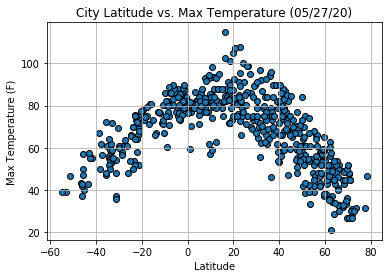

In [162]:
#Latitude vs Temperature scatter plot
plt.scatter(city_pd["Lat"], city_pd["Max Temp"], edgecolor="black", marker="o", label="Cities")

#Plot labels and title
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

plt.savefig("../output_data/Lat_Temp.png")
plt.show() 	 

## Latitude vs. Humidity Plot

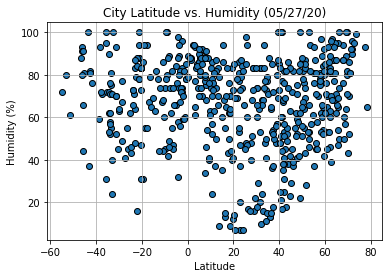

In [163]:
#Latitude vs Temperature scatter plot
plt.scatter(city_pd["Lat"], city_pd["Humidity"], edgecolor="black", marker="o", label="Cities")

#Plot labels and title
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("../output_data/Lat_Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

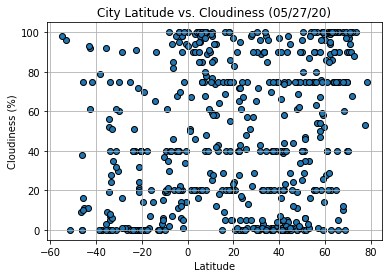

In [164]:
#Latitude vs Temperature scatter plot
plt.scatter(city_pd["Lat"], city_pd["Cloudiness"], edgecolor="black", marker="o", label="Cities")

#Plot labels and title
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("../output_data/Lat_Cloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

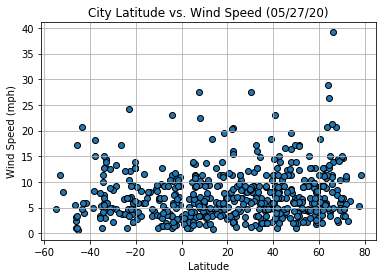

In [167]:
#Latitude vs Temperature scatter plot
plt.scatter(city_pd["Lat"], city_pd["Wind Speed"], edgecolor="black", marker="o", label="Cities")

#Plot labels and title
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig("../output_data/Lat_Wind.png")
plt.show()

## Linear Regression

In [166]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8271188905041935


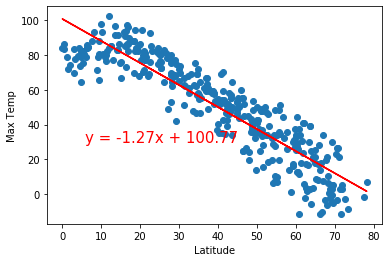

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.39936284758885965


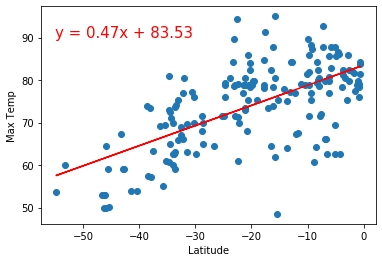

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10829462153873139


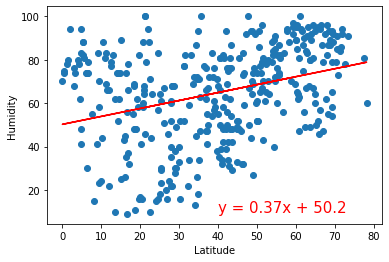

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008996079328825663


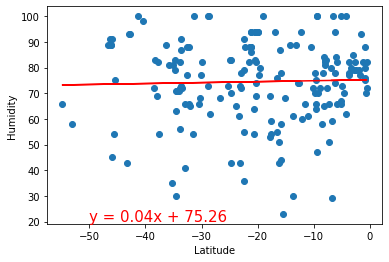

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05768812657005063


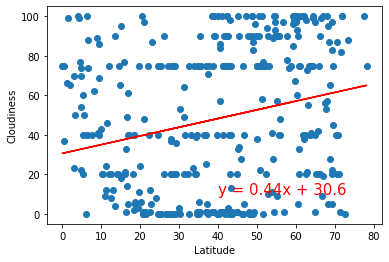

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0684912094859049


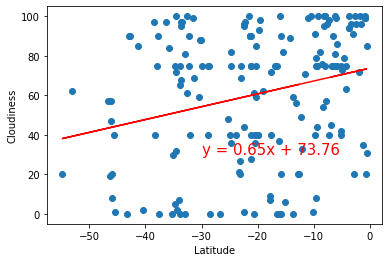

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023371104533850804


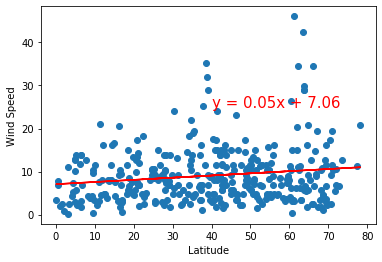

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03381889207758188


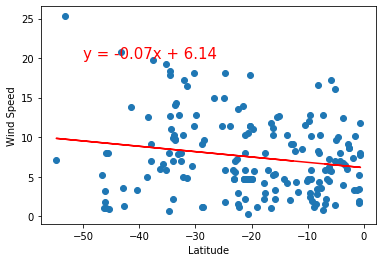